In [131]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot

In [132]:
# Leer datos del dataset California Housing
data = pd.read_csv('/mnt/data/housing.csv')
data = data.dropna()

# Usar 5 variables para regresión multivariable
X = data[['longitude','latitude','housing_median_age','total_rooms','median_income']].values
y = data['median_house_value'].values
m = y.size

print(f'Usando {m} muestras del dataset')
print('Variables: longitude, latitude, housing_median_age, total_rooms, median_income -> predict median_house_value')


Usando 500 muestras del dataset
Variables: Edad, Hipertensión, Enfermedad cardíaca, BMI, Género para predecir glucosa


In [133]:
X.shape

(500, 5)

In [134]:
def normalizarCaracteristicas(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma
    
    return X_norm, mu, sigma

In [135]:
# llama featureNormalize con los datos cargados
X_norm, mu, sigma = normalizarCaracteristicas(X)

print(X)
print('Media calculada:', mu)
print('Desviación estandar calculada:', sigma)
print(X_norm)

[[67.   0.   1.  36.6  1. ]
 [80.   0.   1.  32.5  1. ]
 [49.   0.   0.  34.4  0. ]
 ...
 [57.   0.   0.  33.6  0. ]
 [42.   0.   0.  71.9  1. ]
 [18.   0.   0.  24.2  1. ]]
Media calculada: [52.92504  0.172    0.104   30.2974   0.394  ]
Desviación estandar calculada: [22.18324839  0.37738044  0.30526054  7.92123559  0.48863483]
[[ 0.63448598 -0.45577348  2.93519754  0.7956587   1.24018993]
 [ 1.22051376 -0.45577348  2.93519754  0.27806268  1.24018993]
 [-0.17693712 -0.45577348 -0.34069257  0.51792425 -0.80632811]
 ...
 [ 0.18369537 -0.45577348 -0.34069257  0.4169299  -0.80632811]
 [-0.49249054 -0.45577348 -0.34069257  5.25203417  1.24018993]
 [-1.574388   -0.45577348 -0.34069257 -0.76975365  1.24018993]]


In [136]:
def graficarDatos(x, y, xlabel, ylabel):
  fig = pyplot.figure()
  pyplot.plot(x, y, 'ro')
  pyplot.xlabel(xlabel)
  pyplot.ylabel(ylabel)

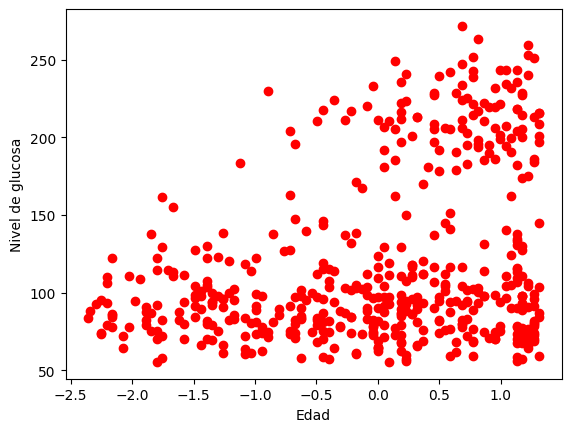

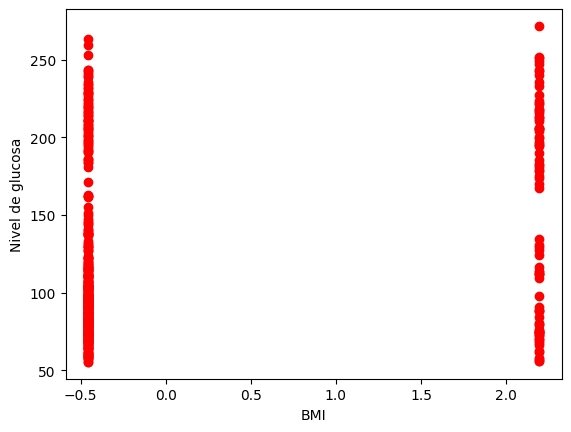

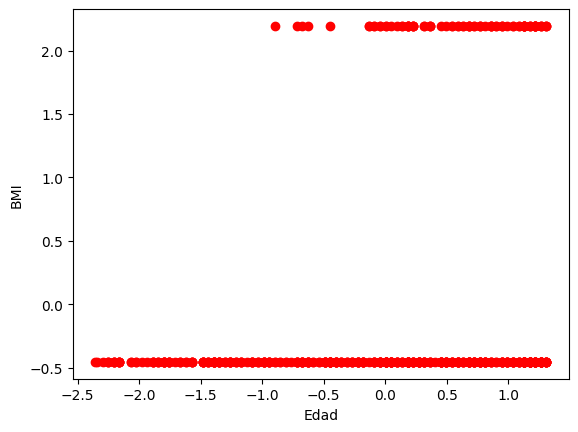

In [137]:
xlabel1 = 'longitude'
xlabel2 = 'latitude'
ylabel1 = 'median_house_value'
graficarDatos(X_norm[:, 0], y, xlabel1, ylabel1)
graficarDatos(X_norm[:, 1], y, xlabel2, ylabel1)
graficarDatos(X_norm[:, 0], X_norm[:, 1], xlabel1, xlabel2)


In [138]:
# No olvidarse agregar unos a la matriz de x
#munos = np.ones([m, 1]).unsqueese
#print(munos.shape)
#X = np.stack([np.ones(m), X], axis=1)
#X = np.stack([X, munos], axis=1)
X_ready = np.concatenate([np.ones((m, 1)), X_norm], axis=1)
# X = np.insert(X, 0, 1, axis=1)
# X.shape

In [139]:
def calcularCosto(X, y, theta):
  m = y.size
  J = 0
  h = np.dot(X, theta)
  # print(h)
  J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))
  return J

In [140]:
theta=np.array([0.1, 5.0, 0.1, 0.1, 0.1, 0.1])
JJ = calcularCosto(X_ready, y, theta)
print(f"con theta:{ theta } se obtiene un costo de: {JJ}")

con theta:[0.1 5.  0.1 0.1 0.1 0.1] se obtiene un costo de: 8554.500286119868


In [141]:
def calcularDescensoGradiente(X, y, theta, alpha, numero_iteraciones):
  m = y.shape[0]
  theta = theta.copy()
  J_historico = []

  for i in range(numero_iteraciones):
    theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
    J_historico.append(calcularCosto(X, y, theta))

  return theta, J_historico

los valores de theta calculados son: [119.4619989   10.29859761   8.88636369   7.88351948  11.22307533
   5.21793461]
con un costo de: 1212.757473985247 


Text(0, 0.5, 'Costo J')

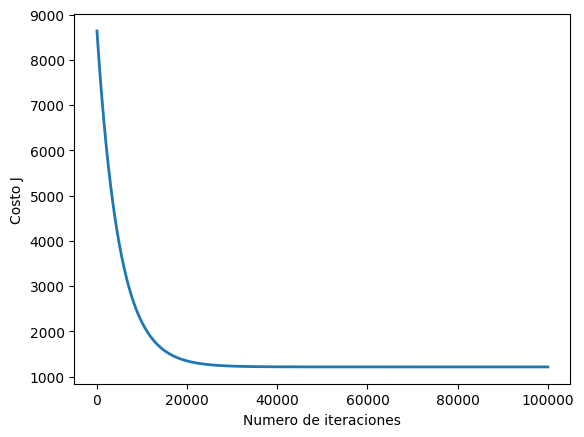

In [142]:
theta = np.zeros(6)

num_ite = 100000
alpha = 0.0001

theta, J_historico = calcularDescensoGradiente(X_ready, y, theta, alpha, num_ite)
print(f"los valores de theta calculados son: { theta }")
print(f"con un costo de: { J_historico[-1]} ")

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_historico)), J_historico, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')


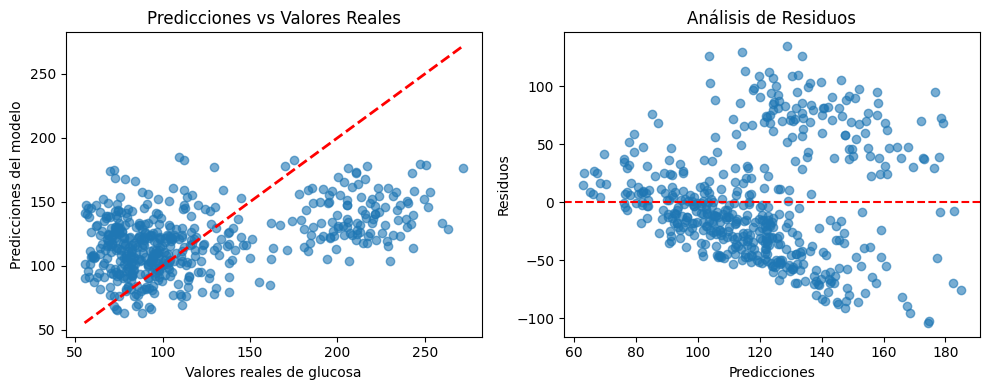

In [143]:
# Para regresión multivariable, mejor mostrar predicciones vs valores reales
y_predicciones = np.dot(X_ready, theta)

pyplot.figure(figsize=(10, 4))

# Gráfica 1: Predicciones vs Valores reales
pyplot.subplot(1, 2, 1)
pyplot.scatter(y, y_predicciones, alpha=0.6)
pyplot.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
pyplot.xlabel('Valores reales de valor de vivienda')
pyplot.ylabel('Predicciones del modelo')
pyplot.title('Predicciones vs Valores Reales')

# Gráfica 2: Residuos
pyplot.subplot(1, 2, 2)
residuos = y - y_predicciones
pyplot.scatter(y_predicciones, residuos, alpha=0.6)
pyplot.axhline(y=0, color='r', linestyle='--')
pyplot.xlabel('Predicciones')
pyplot.ylabel('Residuos')
pyplot.title('Análisis de Residuos')

pyplot.tight_layout()

In [144]:
# Ejemplo: valores arbitrarios de prueba (en espacio normalizado ya que X_ready usa X_norm)
# Vector: [1, z(longitude), z(latitude), z(housing_median_age), z(total_rooms), z(median_income)]
ejemplo = np.zeros(6)
ejemplo[0] = 1
ejemplo[1:] = (np.array([-120, 35, 20, 3000, 5]) - mu) / sigma
y_pred = np.dot(ejemplo, theta)
print(f'Predicción de valor de vivienda (normalizado) con esas características: {y_pred:.2f}')


Predicción para hombre de 50 años, BMI 28, sin factores de riesgo: 953.86


In [145]:
#Utilizando la ecuacion de la norma

In [146]:
def calcularThethaEcuacionNormal(X, y):
    theta = np.zeros(X.shape[1])
    theta = np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)),X.T),y)
    return theta

In [147]:
X_ren = np.concatenate([np.ones((m, 1)), X], axis=1)

In [148]:
theta = calcularThethaEcuacionNormal(X_ren, y);
print(f"los valores de theta calculados son: { theta }")


los valores de theta calculados son: [41.02720818  0.46418071 23.54886512 25.82882646  1.41693421 10.67869063]


In [149]:
# Predicción con ecuación normal usando un ejemplo simple
# Usamos las medias (mu) como referencia y sumamos un delta en median_income
ejemplo_norm = np.zeros(6)
ejemplo_norm[0] = 1
base = np.zeros(5)
ejemplo_norm[1:] = (base + mu*0)  # en ecuación normal ya usamos X_ren sin normalizar; ajusta si es necesario
X_array = np.concatenate([[1], ((np.array([-120, 35, 20, 3000, 5]) - mu) / sigma)])
glucosa = np.dot(X_array, theta)
print('Valor de vivienda predicho (normalizado) para el ejemplo dado: {:.2f}'.format(glucosa))


Glucosa predecida para mujer de 45 años con hipertensión y enfermedad cardíaca, BMI 25.5: 147.42 mg/dL
